# Patching Away the Player Base?
## Does Patching the Game affect the Player Base of Video Games?

By TJ Laryea IV <br>
December 11th, 2023

Video games are susceptible to bugs, broken mechanics, and characters, and the natural remedy to these problems is for developers to patch them. Most, if not all, gamers want their competitive games to be balanced, but is it possible developers go too far with patching? Can too frequent patches or patching things players love lead to a drop in player base? In this report, I will uncover the truth and try to explain the balance of how much patching is acceptable in order to keep players happy and playing the games.

In order to perform this analysis, I will need to locate and store the numerous amounts of player data that come with all of these games. One limitation to this analysis is the fact that I am only able to analyze the PC playerbases, as data on console player data numbers is extremely difficult to come by and is often hidden by the major companies in Microsoft and Sony.

The games I will be analyzing in this study are Valorant, Tom Clancy's Rainbow Six Siege, and Apex Legends. These 3 are some of the most competitive games in recent years and are subject to patching and balancing. For each game, I will be going through the patch notes by the developers and finding the months in which they occurred and giving each month a number, with 0 meaning no patch and 1 indicating there was a patch within that month.

My hypothesis for this study is that patching has a pretty negative effect on the player count within games. From my own personal experience with playing games, I have found that when developers constantly make changes to the game, whether they be buffs (improving their competitive nature) to weaker things or significant nerfs (weakening their competitive nature), overall it can leave some players feeling jaded about the game and more often than not leaving the game entirely for a period of time. <hr>

In [1]:
import pandas as pd
import bs4 
import requests as rq
import numpy as np
from datetime import datetime as dt
from scipy import stats
from matplotlib import pyplot as plt

For this analysis I used a plethora of Python packages that allow me to do many things from visualizing the data all the way to performing some statistical analysis.

## Loading In the Data & Data Cleaning
For all of the data sets I found, I had to go to various websites and request the HTML content from the page. I then took the content from the websites and put it into dataframes for me to analyze. For each game I exported the Pandas Dataframe as a CSV file in order for me to manually add in the Patch number

For a couple of the games, the games released earlier on consoles so there is some empty months in the dataframes but the game technically was not released. For the sake of having an accurate representation of my data, I decided to remove these empty months from the data frame as to not skew the mean out of proportion.

In [2]:
r6_steam = rq.get("https://steamcharts.com/app/359550").content
df_list = pd.read_html(r6_steam)
r6PlayerData = df_list[-1]
r6PlayerData.to_csv('r6PlayerData.csv', index=False)

In [3]:
r6Patch = pd.read_csv('r6PlayerData_ACTUAL.csv')
r6Patch.head()
r6Patch['Months'] = [dt.strptime(x, '%b-%y') for x in r6Patch['Month']]
r6PlayerSort = pd.DataFrame(r6Patch.sort_values("Months", ascending = True))
r6PlayerSort.head()

,Month,Gain,% Gain,Peak Players,Patch,Months
75,Aug-17,5545,19.54%,73641,1,2017-08-01
74,Sep-17,2526,7.45%,69988,0,2017-09-01
73,Oct-17,-4830,-13.25%,59895,1,2017-10-01
72,Nov-17,9865,31.20%,99110,0,2017-11-01
71,Dec-17,17928,43.22%,100433,0,2017-12-01


The data came in reverse order so I had to use the python module called StripTime in order to add a timestamp to the data and then reverse it using the sort value method in Pandas. I had to do this for each dataset. 

In [4]:
r60 = r6PlayerSort[r6PlayerSort["Patch"] == 0]
# Separating the dataframe into months without patches and months with patches

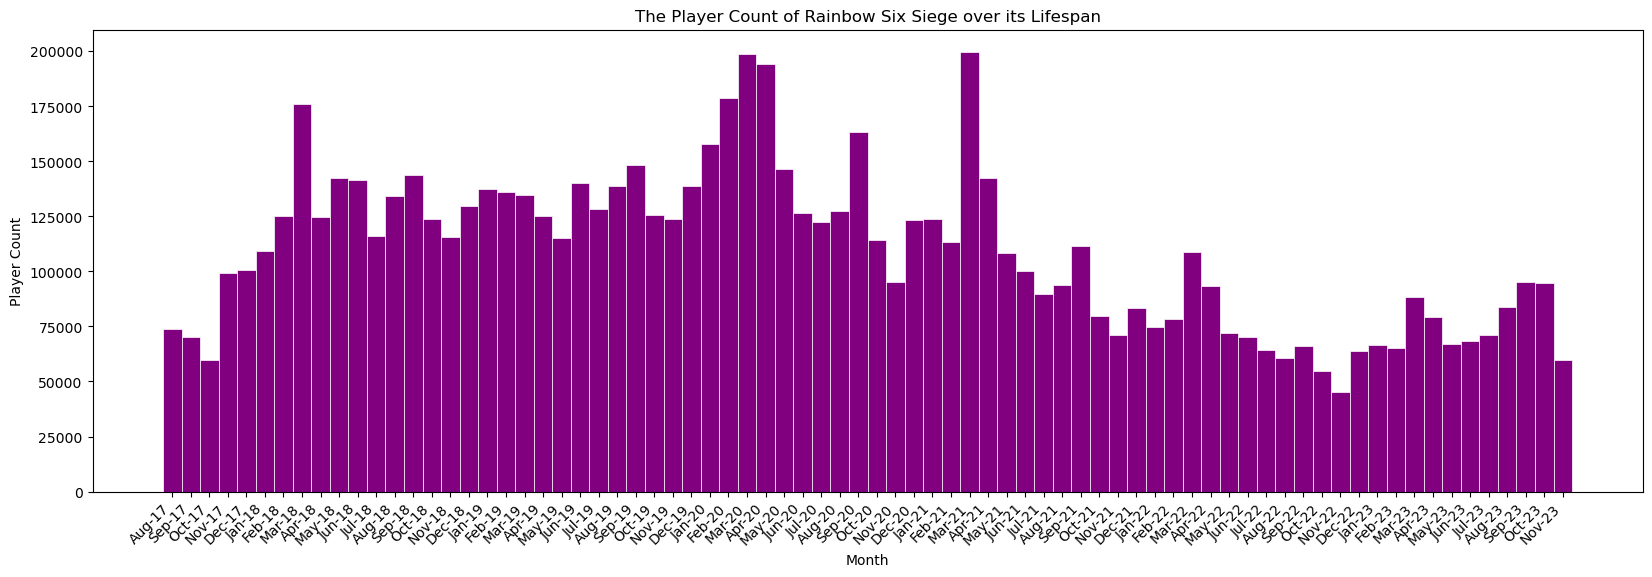

In [5]:
fig1, ax1 = plt.subplots()
ax1.bar(r6PlayerSort["Month"], r6PlayerSort["Peak Players"], width=1, edgecolor="white", linewidth=0.5, color = "Purple")
plt.gcf().set_size_inches(20, 6)
plt.xticks(rotation=45, ha = "right")
# Creating the figure and seeting up the x label

ax1.set_title("The Player Count of Rainbow Six Siege over its Lifespan")
ax1.set_xlabel('Month')
ax1.set_ylabel('Player Count')

plt.show()
# This is the full dataset

This initial graph is showing us the player count of Rainbow Six Siege over its entire lifespan on Steam.

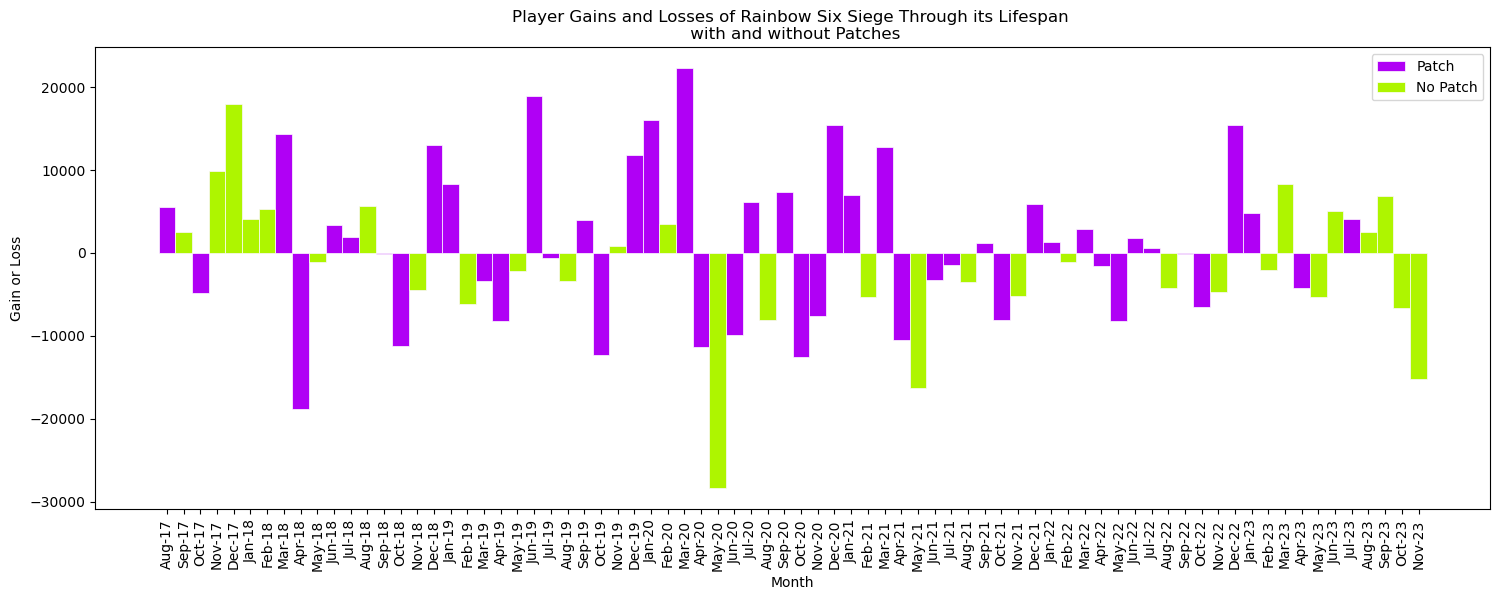

In [6]:
fig2, ax2 = plt.subplots()
ax2.bar(r6PlayerSort["Month"], r6PlayerSort["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#B000F5", label = "Patch")
ax2.bar(r60["Month"], r60["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#AEF500", label = "No Patch")
# Creating the bar plots with Month as the X and the Gain variable as the Y

plt.gcf().set_size_inches(18, 6)
plt.xticks(rotation=90, ha="center")  
# Setting the size of the chart and rotating the x label names and location
ax2.set_title("Player Gains and Losses of Rainbow Six Siege Through its Lifespan \n with and without Patches")
ax2.set_xlabel('Month')
ax2.set_ylabel('Gain or Loss')
ax2.legend()

plt.show()


## Rainbow Six Siege Chart Data Breakdown
The data this shows us is that rainbow six siege is patched on a infrequent basis and whether or not a patch occurs does not seem to have a clear indicatior of overall player count. Which is why I will run an independent T Test to see just how significant a patch is to the overall player count. 

## Rainbow Six Siege Statistic Breakdown

In [7]:
r6Results = stats.ttest_ind(r6PlayerSort[r6PlayerSort['Patch'] == 0]['Gain'], 
                            r6PlayerSort[r6PlayerSort['Patch'] == 1]['Gain'])

In [8]:
print(r6Results.statistic)
print(r6Results.pvalue)

-1.4021066466104157
0.16506437595104406


This first set of T tests is testing the relationship between gain and patch, with an emphasis on when a patch is present vs. when it is not. From the results, we can see that our pvalue is less than .5 which means there is a strong chance there is a significant correlation between patching and player count. The result from this T Test is telling us that when there is not a patch we will see more significant increase in player count.

<hr>

## Valorant Data
Below is the data on the competitve game Valorant. <br>
<em> From e-Safety.Com: <br>
Valorant is an online multiplayer computer game, produced by Riot Games. It is a first-person shooter game, consisting of two teams of five, where one team attacks and the other defends. Players control characters known as 'agents', who all have different abilities to use during gameplay.
</em>
<br>


Valorant is a very popular game garnering well over 1 million players and since it is a First Person Shooter (FPS) it is subject to countless balancing changes in order to keep the game fun and fair.

In [9]:
valorant_tracker = rq.get("https://tracker.gg/valorant/population").content

In [10]:
df_list4 = pd.read_html(valorant_tracker)
valorantPlayerData = df_list4[0]
valorantPlayerData.head()
valorantPlayerData.to_csv('valorantPlayerData.csv', index=False)

In [11]:
valorantPatch = pd.read_csv('valorantPlayerData_Update.csv')
valorantPatch.head()
valorantPatch['Months'] = [dt.strptime(x, '%y-%b') for x in valorantPatch['Date']]
valorantPlayerSort = pd.DataFrame(valorantPatch.sort_values("Months", ascending = True))

In [12]:
valorant0 = valorantPlayerSort[valorantPlayerSort["Patch"] == 0]

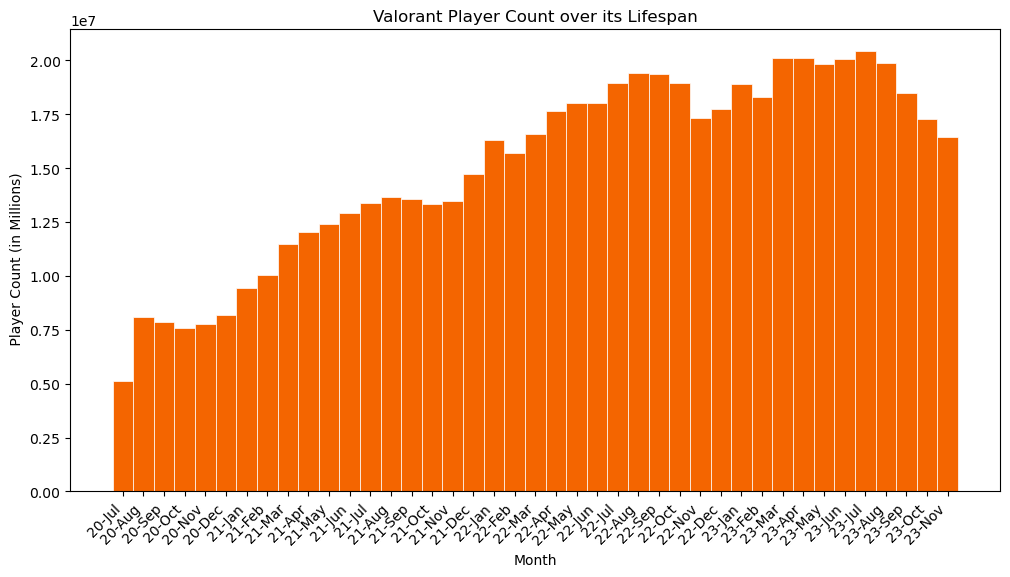

In [13]:
fig3, ax3 = plt.subplots()
ax3.bar(valorantPlayerSort["Date"], valorantPlayerSort["Players Count"], width=1, edgecolor="white", linewidth=0.5, color = "#F46500")
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")

ax3.set_title("Valorant Player Count over its Lifespan")
ax3.set_ylabel(" Player Count (in Millions)")
ax3.set_xlabel("Month")
plt.show()

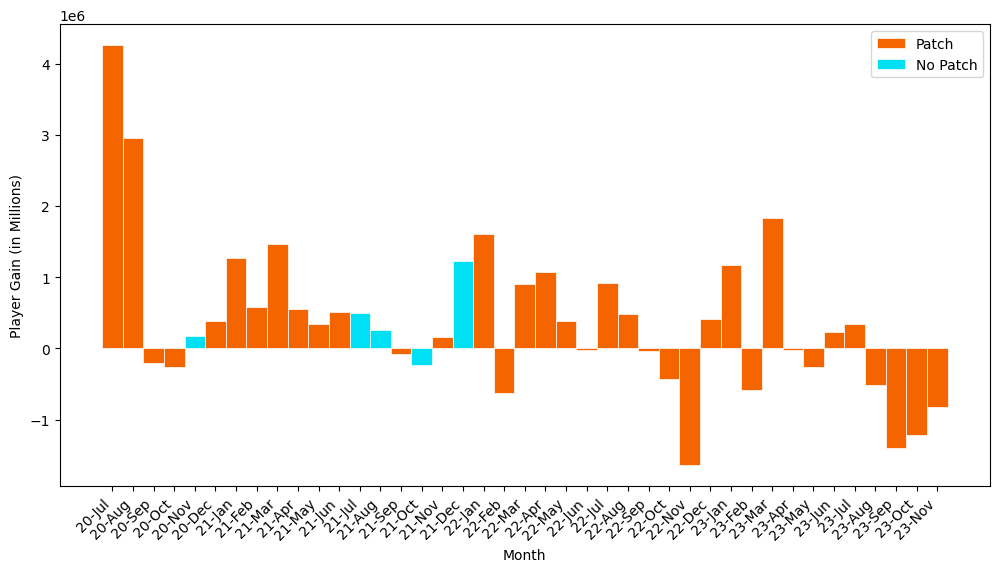

In [14]:
fig4, ax4 = plt.subplots()
ax4.bar(valorantPlayerSort["Date"], valorantPlayerSort["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#F46500", label = "Patch")
ax4.bar(valorant0["Date"], valorant0["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#00E0F5", label = "No Patch")

ax4.set_xlabel("Month")
ax4.set_ylabel("Player Gain (in Millions)")
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  
ax4.legend()
plt.show()

The data this shows us is that Valorant is patched very often specifically 87% of the time (36/41 months). For the most part this data is showing us that more often that not patches within Valorant lead to a gain in players and it is only more recently in the last 4 months has there been a sharp decline in players playing the game. This makes sense as in those patches the developers made significant changes to fan favorite things which turned players away <hr>

In [15]:
valorantResults = stats.ttest_ind(valorantPlayerSort[valorantPlayerSort['Patch'] == 0]['Gain'], 
                            valorantPlayerSort[valorantPlayerSort['Patch'] == 1]['Gain'])

print(valorantResults.statistic)
print(valorantResults.pvalue)

0.0010493603643952666
0.9991680810790108


This second set of T tests is testing the relationship between gain and patch, with an emphasis on when a patch is present vs. when it is not. From the results, we can see that our pvalue is higher than.5, which leads us to believe there is little correlation between how a gain performs when a patch is present and when a patch is not. There is one flaw in this analysis, however, as the sample size for months without a patch is significantly smaller than the data when a patch occurs.

## Apex Legends Data

In [16]:
apex_steam = rq.get("https://steamcharts.com/app/1172470").content

In [17]:
df_list5 = pd.read_html(apex_steam)
apexPlayerData = df_list5[-1]
apexPlayerData
apexPlayerData.to_csv('apexPlayerData.csv', index=False)

In [30]:
apexPatch = pd.read_csv('apexPlayerData_Updated.csv')
apexPatch.head()

,Month,Avg. Players,Gain,% Gain,Peak Players,Patch
0,23-Nov,167296,-14125,-7.79%,438349,0
1,23-Oct,181420,-5074,-2.72%,435229,1
2,23-Sep,186494,-2397,-1.27%,452991,0
3,23-Aug,188892,22693,13.65%,451223,1
4,23-Jul,166199,-22902,-12.11%,349762,0


For the datasets, I will be using the T Test to see whether or not a patch occuring within a month affects the overall player count. I believe the results will lean more towards having an effect. I will be comparing the overall Gain of players which can be positive or negative and putting it up against the Patch variable I created by finding the patch notes for each individual game and manually plotting for when a patch occured.

For the sake of consistency I am considering a patch as anything that fundanmentally changes gameplay so in short, bug fixes or Quality of Life improvements do not count as patches

In [32]:
apexPatch['Months'] = [dt.strptime(x, '%y-%b') for x in apexPatch['Month']]
# Adding a new Table section that allows us to sort the values easier
apexPlayerSort = pd.DataFrame(apexPatch.sort_values("Months", ascending = True))
# Sorting the values in descending order based off the month and year
apex0 = apexPlayerSort[apexPlayerSort["Patch"]== 0]
# Sorting the data to only months without a patch
apex0.head()

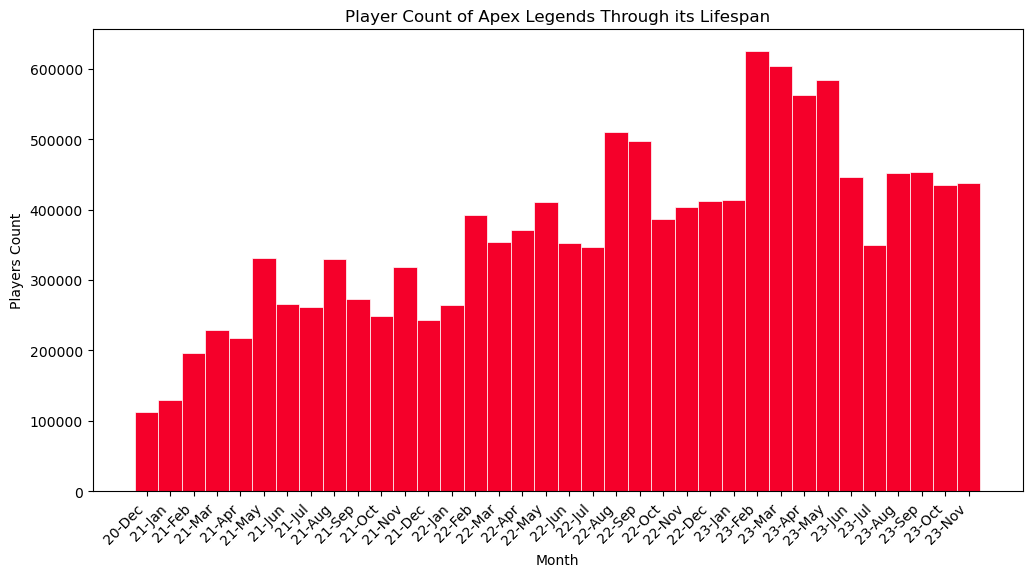

In [42]:
fig6, ax6 = plt.subplots()
ax6.bar(apexPlayerSort["Month"], apexPlayerSort["Peak Players"], width=1, edgecolor="white", linewidth=0.5, color = "#F5002A", label = "Patch")
# Plotting the apex player data
plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  
# Setting the figure size, X label rotations and size.
ax6.set_title("Player Count of Apex Legends Through its Lifespan")
ax6.set_xlabel('Month')
ax6.set_ylabel('Players Count')

plt.show()

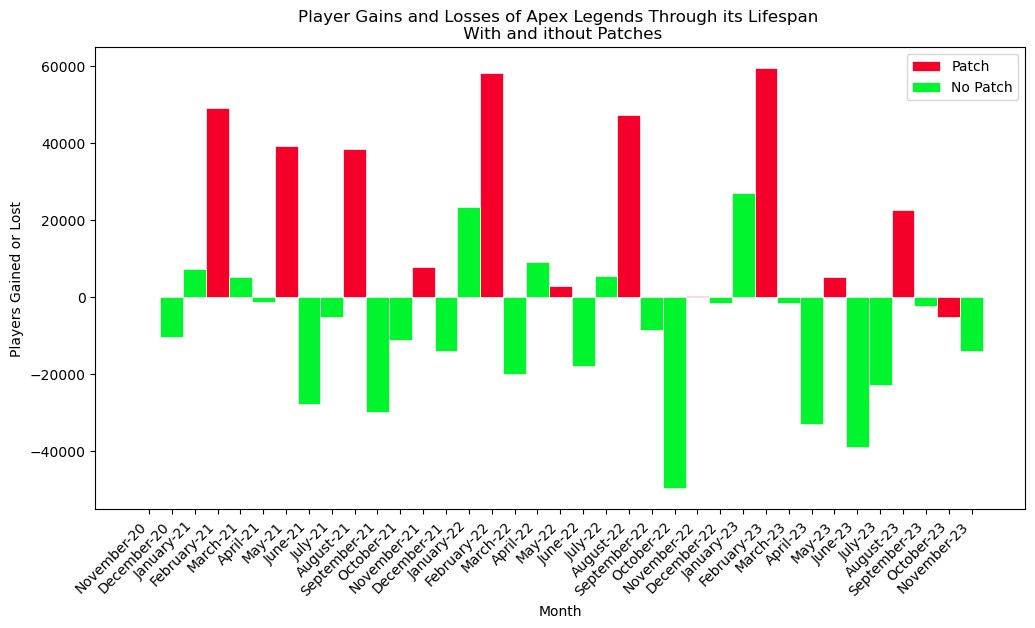

In [28]:
fig5, ax5 = plt.subplots()
ax5.bar(apexPlayerSort["Month"], apexPlayerSort["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#F5002A", label = "Patch")
ax5.bar(apex0["Month"], apex0["Gain"], width=1, edgecolor="white", linewidth=0.5, color = "#00F52E", label = "No Patch")


plt.gcf().set_size_inches(12, 6)
plt.xticks(rotation=45, ha="right")  

ax5.set_title("Player Gains and Losses of Apex Legends Through its Lifespan \n With and ithout Patches")
ax5.set_xlabel('Month')
ax5.set_ylabel('Players Gained or Lost')
ax5.legend()

plt.show()

In [34]:
apexResults = stats.ttest_ind(apexPatch[apexPatch['Patch'] == 0]['Gain'], apexPatch[apexPatch['Patch'] == 1]['Gain'])

In [35]:
apexResults.statistic

-5.073022128463457

In [36]:
apexResults.pvalue

1.3813067890529608e-05

This figure is a visual representation of the player count in Apex Legends 